In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
pd.set_option('display.max_columns',None)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
# pip install pmdarima

In [4]:
from pmdarima import AutoARIMA

In [5]:
data = pd.read_csv('C:\\Users\\Sambhu\\Desktop\\Imarticus\\Class Material\\Machine Learning\\Time Series (Read Class Notes)\\Super_Store.csv', encoding='latin-1', date_parser=['Order Date'])

In [6]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [7]:
data.shape

(2121, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [9]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [10]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [12]:
# dropping unecessary columns

In [13]:
data.drop(['Row ID','Order ID','Customer ID', 'Customer Name', 'Postal Code','Product ID'], axis=1, inplace=True)

In [14]:
data.shape

(2121, 15)

In [15]:
data.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,2014-06-09,2014-06-14,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,2014-06-09,2014-06-14,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [16]:
data['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [17]:
data['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [18]:
data['Ship Date'].min()

Timestamp('2014-01-10 00:00:00')

In [19]:
data['Ship Date'].max()

Timestamp('2018-01-05 00:00:00')

In [20]:
data['Ship Date'].sub(data['Order Date'],axis = 0).describe()

count                         2121
mean     3 days 22:00:30.551626591
std      1 days 18:07:32.231661933
min                0 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
dtype: object

In [21]:
data['Ship Mode'].value_counts()

Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: Ship Mode, dtype: int64

In [22]:
class_label = data['Ship Mode'].value_counts().index

In [23]:
class_values = data['Ship Mode'].value_counts().values

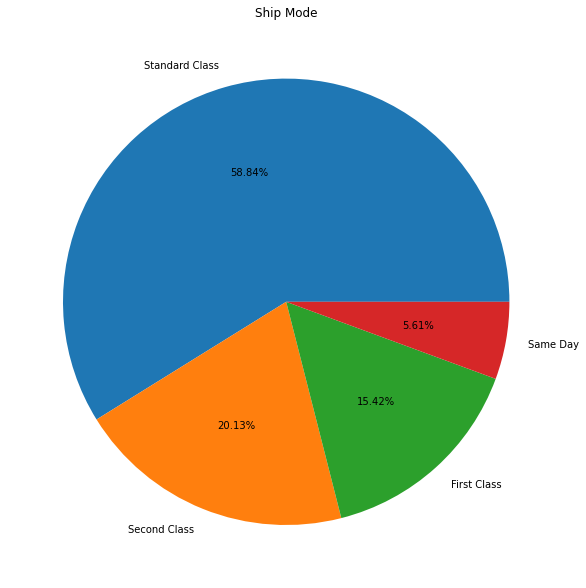

In [24]:
plt.figure(figsize = (10,50))
plt.pie(class_values, labels=class_label, autopct='%1.2f%%')
plt.title("Ship Mode")
plt.show()

In [25]:
data['Ship Date'].sub(data['Order Date'],axis = 0).groupby(data['Ship Mode']).mean()

Ship Mode
First Class      2 days 03:26:58.348623853
Same Day         0 days 00:36:18.151260504
Second Class     3 days 06:17:42.295081967
Standard Class   4 days 23:26:32.307692307
dtype: timedelta64[ns]

<AxesSubplot:xlabel='Ship Mode'>

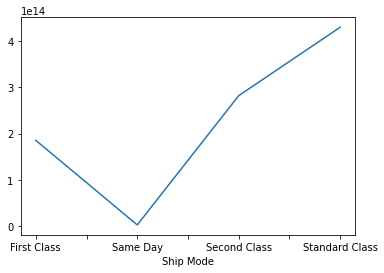

In [26]:
data['Ship Date'].sub(data['Order Date'],axis = 0).groupby(data['Ship Mode']).mean().plot()

In [27]:
data['Segment'].value_counts()

Consumer       1113
Corporate       646
Home Office     362
Name: Segment, dtype: int64

In [28]:
class_label = data['Segment'].value_counts().index

In [29]:
class_values = data['Segment'].value_counts().values

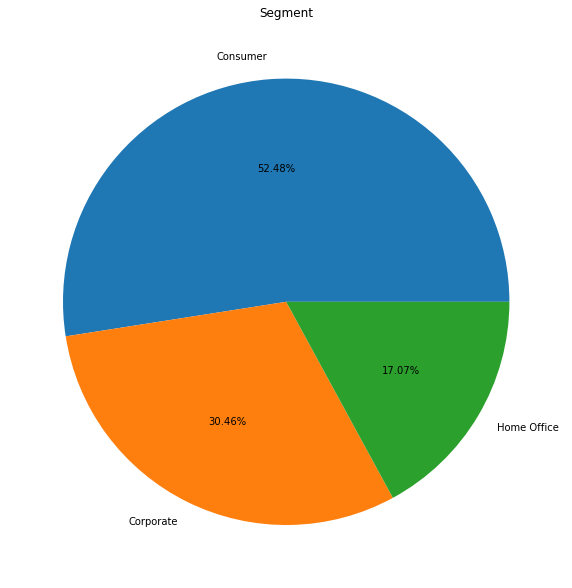

In [30]:
plt.figure(figsize = (10,50))
plt.pie(class_values, labels=class_label, autopct='%1.2f%%')
plt.title("Segment")
plt.show()

In [31]:
data['Ship Date'].sub(data['Order Date'],axis = 0).groupby(data['Segment']).mean()

Segment
Consumer      3 days 21:05:20.215633423
Corporate     3 days 23:33:15.046439628
Home Office   3 days 22:04:38.453038674
dtype: timedelta64[ns]

<AxesSubplot:xlabel='Segment'>

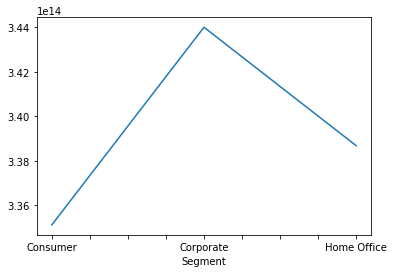

In [32]:
data['Ship Date'].sub(data['Order Date'],axis = 0).groupby(data['Segment']).mean().plot()

In [33]:
data['Ship Mode'][data['Segment'] == 'Consumer'].value_counts()

Standard Class    647
Second Class      236
First Class       164
Same Day           66
Name: Ship Mode, dtype: int64

In [34]:
data['Ship Mode'][data['Segment'] == 'Corporate'].value_counts()

Standard Class    393
Second Class      121
First Class       104
Same Day           28
Name: Ship Mode, dtype: int64

In [35]:
data['Ship Mode'][data['Segment'] == 'Home Office'].value_counts()

Standard Class    208
Second Class       70
First Class        59
Same Day           25
Name: Ship Mode, dtype: int64

In [36]:
data['Country'].value_counts()

United States    2121
Name: Country, dtype: int64

In [37]:
data['State'].value_counts()

California              444
New York                236
Texas                   202
Pennsylvania            125
Illinois                123
Washington              114
Ohio                     93
Florida                  85
Virginia                 52
Colorado                 51
Michigan                 50
Arizona                  49
Tennessee                45
North Carolina           42
Massachusetts            33
Georgia                  32
Wisconsin                32
Kentucky                 30
Maryland                 28
New Jersey               26
Indiana                  23
Oregon                   21
Delaware                 18
Rhode Island             16
Oklahoma                 15
Minnesota                13
Connecticut              13
Louisiana                11
Alabama                  11
Missouri                 11
Mississippi               9
Arkansas                  9
Nevada                    9
Utah                      7
New Hampshire             6
South Carolina      

In [38]:
class_label = data['State'].value_counts().index

In [39]:
class_values = data['State'].value_counts().values

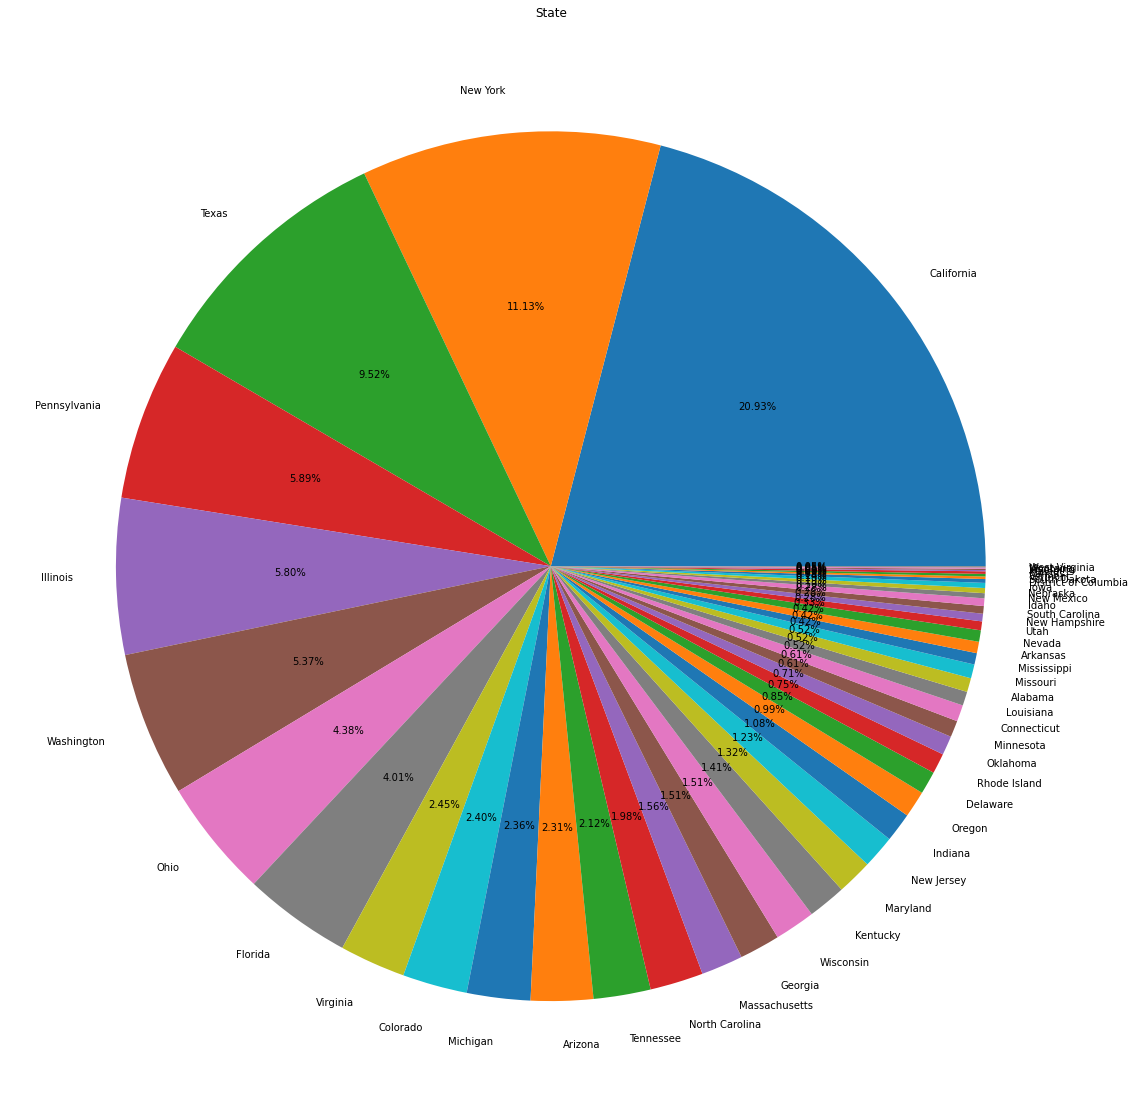

In [40]:
plt.figure(figsize = (30,20))
plt.pie(class_values, labels=class_label, autopct='%1.2f%%')
plt.title("State")
plt.show()

In [41]:
data['State'].value_counts()[data['State'].value_counts() >= 50]

California      444
New York        236
Texas           202
Pennsylvania    125
Illinois        123
Washington      114
Ohio             93
Florida          85
Virginia         52
Colorado         51
Michigan         50
Name: State, dtype: int64

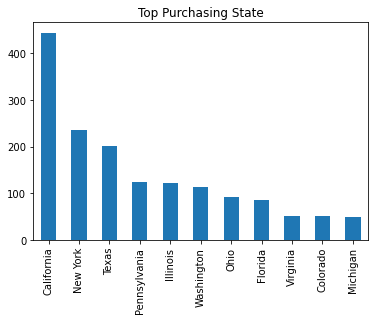

In [42]:
data['State'].value_counts()[data['State'].value_counts() >= 50].plot(kind = 'bar')
plt.title("Top Purchasing State")
plt.show()

In [43]:
data['City'].value_counts()

New York City     192
Los Angeles       154
Philadelphia      111
San Francisco     102
Seattle            97
                 ... 
Tyler               1
Port Arthur         1
Citrus Heights      1
Bullhead City       1
Indianapolis        1
Name: City, Length: 371, dtype: int64

In [44]:
top_city = data['City'].value_counts()[data['City'].value_counts() >= 50]

In [45]:
top_city

New York City    192
Los Angeles      154
Philadelphia     111
San Francisco    102
Seattle           97
Houston           81
Chicago           68
Name: City, dtype: int64

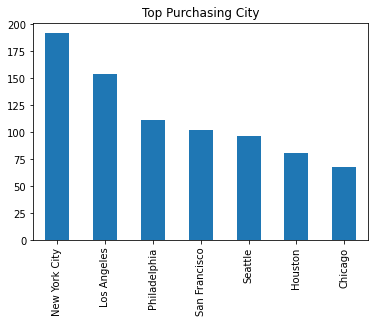

In [46]:
data['City'].value_counts()[data['City'].value_counts() >= 50].plot(kind = 'bar')
plt.title("Top Purchasing City")
plt.show()

In [47]:
data_top_city = data[(data.City == 'New York City')|(data.City == 'Los Angeles')|(data.City == 'Philadelphia')|(data.City == 'San Francisco')|(data.City == 'Seattle')|(data.City == 'Houston')|(data.City == 'Chicago')]

In [48]:
data_top_city.State.value_counts()

California      256
New York        192
Pennsylvania    111
Washington       97
Texas            81
Illinois         68
Name: State, dtype: int64

In [49]:
data['City'][data['State'] == 'California'].unique()

array(['Los Angeles', 'Roseville', 'San Francisco', 'Concord',
       'Costa Mesa', 'San Diego', 'Vallejo', 'Long Beach', 'Lancaster',
       'Lake Elsinore', 'Santa Ana', 'Torrance', 'Oceanside', 'Encinitas',
       'Fresno', 'Pasadena', 'Pico Rivera', 'Laguna Niguel', 'Oakland',
       'San Jose', 'Brentwood', 'Pomona', 'Ontario', 'Redlands',
       'Sunnyvale', 'Sacramento', 'Hesperia', 'Bakersfield',
       'Redondo Beach', 'Mission Viejo', 'Inglewood', 'Chula Vista',
       'Lakewood', 'Citrus Heights', 'San Gabriel', 'Manteca', 'Danville',
       'Anaheim', 'Apple Valley', 'Fairfield', 'Lake Forest', 'Chico',
       'Oxnard', 'Thousand Oaks', 'El Cajon', 'Salinas', 'Burbank',
       'Camarillo', 'Westminster', 'Morgan Hill', 'Modesto', 'Stockton',
       'Moreno Valley', 'Santa Barbara', 'San Bernardino'], dtype=object)

In [50]:
data['City'][data['State'] == 'New York'].unique()

array(['Troy', 'New York City', 'Oceanside', 'Rochester', 'Auburn',
       'Yonkers', 'Watertown', 'Long Beach', 'Hempstead', 'Freeport',
       'New Rochelle', 'Rome', 'Buffalo', 'Utica'], dtype=object)

In [51]:
data['City'][data['State'] == 'Pennsylvania'].unique()

array(['Philadelphia', 'Chester', 'Allentown', 'York', 'Lancaster',
       'Bethlehem', 'Reading'], dtype=object)

In [52]:
data['City'][data['State'] == 'Washington'].unique()

array(['Seattle', 'Vancouver', 'Edmonds', 'Olympia', 'Kent', 'Auburn',
       'Spokane', 'Bellingham', 'Pasco', 'Longview', 'Bellevue',
       'Covington', 'Des Moines'], dtype=object)

In [53]:
data['City'][data['State'] == 'Texas'].unique()

array(['Richardson', 'Houston', 'San Antonio', 'Amarillo', 'Fort Worth',
       'Arlington', 'Tyler', 'Round Rock', 'Pasadena', 'El Paso',
       'Carrollton', 'Grand Prairie', 'College Station', 'Dallas',
       'Laredo', 'San Angelo', 'Huntsville', 'Corpus Christi', 'Allen',
       'Pharr', 'Brownsville', 'Austin', 'Plano', 'Mesquite', 'Odessa',
       'Harlingen', 'Port Arthur', 'League City', 'Waco', 'Garland',
       'Lubbock', 'Texas City', 'Frisco', 'San Marcos', 'Mansfield',
       'Mcallen', 'Beaumont', 'La Porte', 'Bryan'], dtype=object)

In [54]:
data['City'][data['State'] == 'Pennsylvania'].unique()

array(['Philadelphia', 'Chester', 'Allentown', 'York', 'Lancaster',
       'Bethlehem', 'Reading'], dtype=object)

In [55]:
data['City'][data['State'] == 'Illinois'].unique()

array(['Chicago', 'Bloomington', 'Decatur', 'Park Ridge', 'Aurora',
       'Rockford', 'Evanston', 'Peoria', 'Wheeling', 'Woodstock',
       'Highland Park', 'Skokie', 'Tinley Park', 'Carol Stream',
       'Champaign', 'Freeport', 'Buffalo Grove', 'Elmhurst', 'Naperville',
       'Normal', 'Saint Charles', 'Des Plaines'], dtype=object)

In [56]:
# data_top_city['State'][data_top_city['City'] == 'Columbus'].unique()

In [57]:
data_top_city['Ship Date'].sub(data_top_city['Order Date'],axis = 0).groupby(data_top_city['City']).mean()

City
Chicago         4 days 04:14:07.058823529
Houston                   3 days 20:26:40
Los Angeles     4 days 05:55:19.480519480
New York City             3 days 23:45:00
Philadelphia    3 days 14:55:08.108108108
San Francisco   3 days 11:17:38.823529411
Seattle         3 days 22:45:46.391752577
dtype: timedelta64[ns]

<AxesSubplot:xlabel='City'>

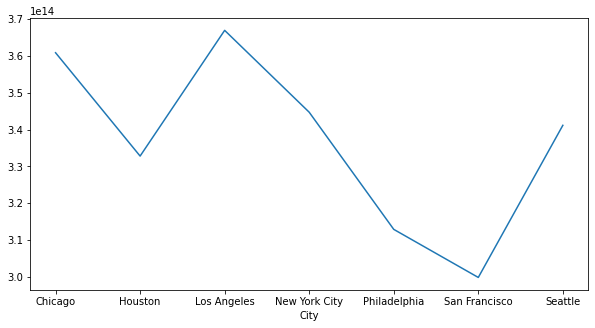

In [58]:
plt.figure(figsize = (10,5))
data_top_city['Ship Date'].sub(data_top_city['Order Date'],axis = 0).groupby(data_top_city['City']).mean().plot()

In [59]:
# We see delivery in New York takes significantly more time, but still it one of the highest ordering city. 
#If delivery time can be reduced in New York more orders can be booked

In [60]:
data['Ship Mode'][data['City'] == 'Chicago'].value_counts()

Standard Class    39
Second Class      17
First Class       10
Same Day           2
Name: Ship Mode, dtype: int64

In [61]:
data['Ship Mode'][data['City'] == 'Houston'].value_counts()

Standard Class    44
Second Class      24
First Class       10
Same Day           3
Name: Ship Mode, dtype: int64

In [62]:
data['Ship Mode'][data['City'] == 'Los Angeles'].value_counts()

Standard Class    99
Second Class      26
First Class       22
Same Day           7
Name: Ship Mode, dtype: int64

In [63]:
data['Ship Mode'][data['City'] == 'New York City'].value_counts()

Standard Class    115
Second Class       44
First Class        20
Same Day           13
Name: Ship Mode, dtype: int64

In [64]:
data['Ship Mode'][data['City'] == 'Philadelphia'].value_counts()

Standard Class    63
First Class       24
Second Class      20
Same Day           4
Name: Ship Mode, dtype: int64

In [65]:
data['Ship Mode'][data['City'] == 'San Francisco'].value_counts()

Standard Class    53
Second Class      21
First Class       19
Same Day           9
Name: Ship Mode, dtype: int64

In [66]:
data['Ship Mode'][data['City'] == 'Seattle'].value_counts()

Standard Class    53
Second Class      24
First Class       12
Same Day           8
Name: Ship Mode, dtype: int64

In [67]:
data['Region'].value_counts()

West       707
East       601
Central    481
South      332
Name: Region, dtype: int64

In [68]:
class_label = data['Region'].value_counts().index

In [69]:
class_values = data['Region'].value_counts().values

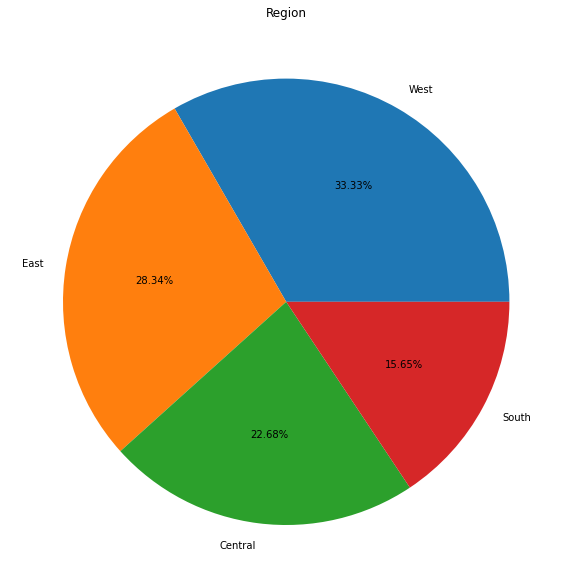

In [70]:
plt.figure(figsize = (10,50))
plt.pie(class_values, labels=class_label, autopct='%1.2f%%')
plt.title("Region")
plt.show()

In [71]:
# From the above analysis we can see only city wise representation gives correct pictures in terms of volume

In [72]:
data['Product Name'].value_counts()

KI Adjustable-Height Table                                                   18
Staple-based wall hangings                                                   16
Situations Contoured Folding Chairs, 4/Set                                   15
Eldon Wave Desk Accessories                                                  14
Global Wood Trimmed Manager's Task Chair, Khaki                              14
                                                                             ..
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order     1
Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops             1
Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled      1
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs                  1
Ultra Commercial Grade Dual Valve Door Closer                                 1
Name: Product Name, Length: 380, dtype: int64

In [73]:
data['Product Name'].value_counts().head(20)

KI Adjustable-Height Table                                                         18
Staple-based wall hangings                                                         16
Situations Contoured Folding Chairs, 4/Set                                         15
Eldon Wave Desk Accessories                                                        14
Global Wood Trimmed Manager's Task Chair, Khaki                                    14
Global High-Back Leather Tilter, Burgundy                                          14
SAFCO Arco Folding Chair                                                           13
Chromcraft Round Conference Tables                                                 13
Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back                        12
Eldon Expressions Wood Desk Accessories, Oak                                       12
Bretford Rectangular Conference Table Tops                                         12
Flat Face Poster Frame                                

In [74]:
# We do not see any good bias of purchase for few particualr product

In [75]:
del data['Product Name']

In [76]:
del data_top_city['Product Name']

In [77]:
data['Sub-Category'].value_counts()

Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64

In [78]:
class_label = data['Sub-Category'].value_counts().index

In [79]:
class_values = data['Sub-Category'].value_counts().values

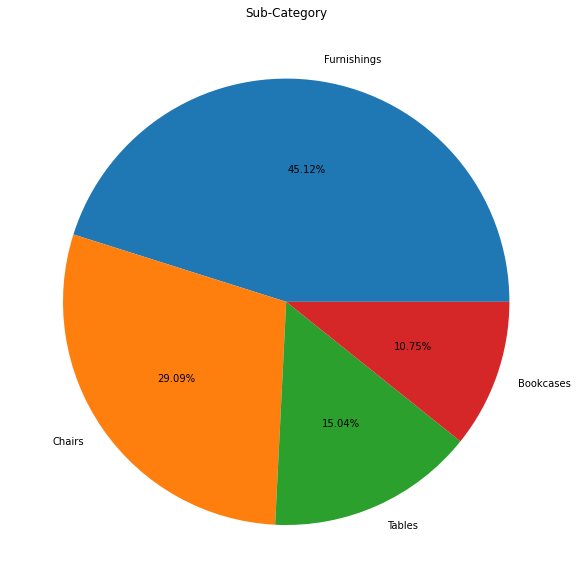

In [80]:
plt.figure(figsize = (10,50))
plt.pie(class_values, labels=class_label, autopct='%1.2f%%')
plt.title("Sub-Category")
plt.show()

In [81]:
data['Ship Date'].sub(data['Order Date'],axis = 0).groupby(data['Sub-Category']).mean()

Sub-Category
Bookcases     3 days 19:28:25.263157894
Chairs        3 days 21:35:17.990275526
Furnishings   3 days 23:04:19.561128526
Tables        3 days 21:26:31.222570532
dtype: timedelta64[ns]

<AxesSubplot:xlabel='Sub-Category'>

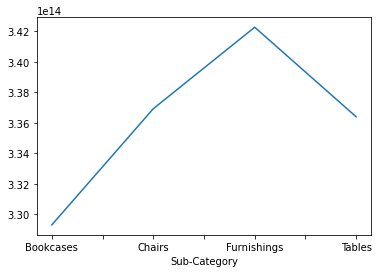

In [82]:
data['Ship Date'].sub(data['Order Date'],axis = 0).groupby(data['Sub-Category']).mean().plot()

In [83]:
data['Ship Mode'][data['Sub-Category'] == 'Bookcases'].value_counts()

Standard Class    124
First Class        49
Second Class       48
Same Day            7
Name: Ship Mode, dtype: int64

In [84]:
data['Ship Mode'][data['Sub-Category'] == 'Chairs'].value_counts()

Standard Class    359
Second Class      134
First Class        85
Same Day           39
Name: Ship Mode, dtype: int64

In [85]:
data['Ship Mode'][data['Sub-Category'] == 'Furnishings'].value_counts()

Standard Class    575
Second Class      184
First Class       146
Same Day           52
Name: Ship Mode, dtype: int64

In [86]:
data['Ship Mode'][data['Sub-Category'] == 'Tables'].value_counts()

Standard Class    190
Second Class       61
First Class        47
Same Day           21
Name: Ship Mode, dtype: int64

In [87]:
data['Category'].value_counts()

Furniture    2121
Name: Category, dtype: int64

In [88]:
data.Sales.describe()

count    2121.000000
mean      349.834887
std       503.179145
min         1.892000
25%        47.040000
50%       182.220000
75%       435.168000
max      4416.174000
Name: Sales, dtype: float64

(array([1600.,  308.,  111.,   53.,   17.,   13.,    9.,    3.,    2.,
           5.]),
 array([1.8920000e+00, 4.4332020e+02, 8.8474840e+02, 1.3261766e+03,
        1.7676048e+03, 2.2090330e+03, 2.6504612e+03, 3.0918894e+03,
        3.5333176e+03, 3.9747458e+03, 4.4161740e+03]),
 <BarContainer object of 10 artists>)

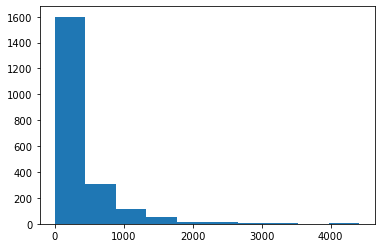

In [89]:
plt.hist(data.Sales)

<AxesSubplot:ylabel='Density'>

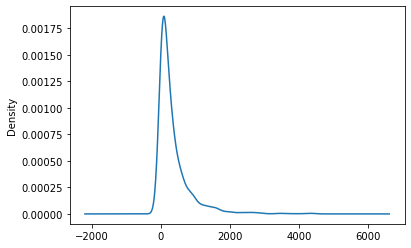

In [90]:
data.Sales.plot(kind='kde')

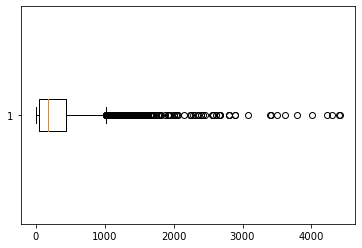

In [91]:
plt.boxplot(data.Sales, vert=False)
plt.show()

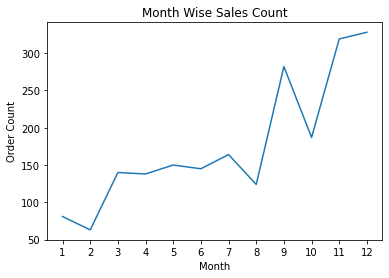

In [92]:
data.Sales.groupby(data['Order Date'].dt.month).count().plot()
plt.xticks(np.arange(1,13, step=1))
plt.title('Month Wise Sales Count')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.show()

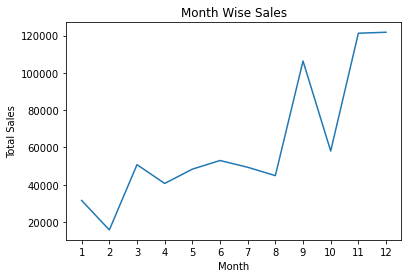

In [93]:
data.Sales.groupby(data['Order Date'].dt.month).sum().plot()
plt.xticks(np.arange(1,13, step=1))
plt.title('Month Wise Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

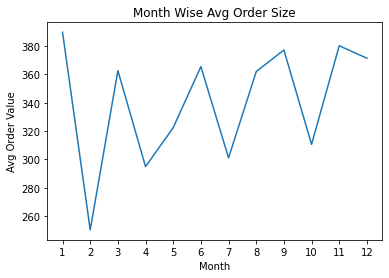

In [94]:
data.Sales.groupby(data['Order Date'].dt.month).mean().plot()
plt.xticks(np.arange(1,13, step=1))
plt.title('Month Wise Avg Order Size')
plt.xlabel('Month')
plt.ylabel('Avg Order Value')
plt.show()

In [95]:
data.Sales.groupby(data['Ship Mode']).describe()

,count,mean,std,min,25%,50%,75%,max
Ship Mode,,,,,,,,
First Class,327.0,338.625452,450.546260,1.988,46.414,191.058,440.7040,2807.840
Same Day,119.0,328.981336,434.819030,5.820,49.608,149.900,418.5825,2453.430
Second Class,427.0,366.016451,579.317381,2.328,40.480,177.225,399.1920,4416.174
Standard Class,1248.0,349.223933,494.639657,1.892,48.643,183.390,442.1610,4404.900


Text(0.5, 1.0, 'Total Sales of Each Class')

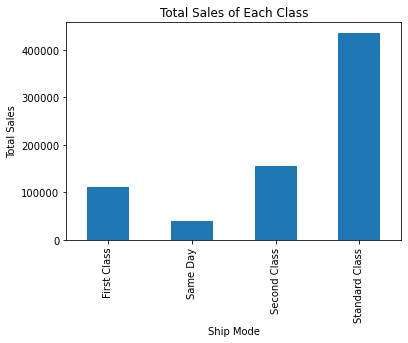

In [96]:
data.Sales.groupby(data['Ship Mode']).sum().plot(kind='bar')
plt.ylabel('Total Sales')
plt.title('Total Sales of Each Class')

Text(0.5, 1.0, 'Total Order of Each Class')

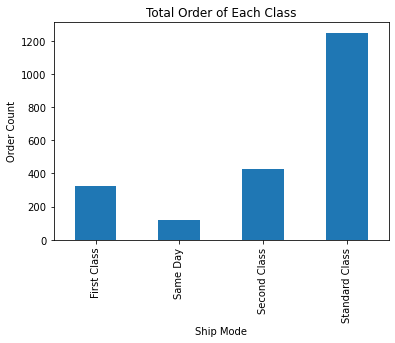

In [97]:
data.Sales.groupby(data['Ship Mode']).count().plot(kind='bar')
plt.ylabel('Order Count')
plt.title('Total Order of Each Class')

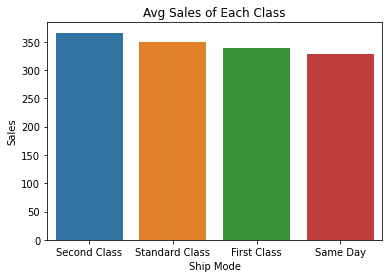

In [98]:
sns.barplot(x= data['Ship Mode'], y = data.Sales, ci=None)
plt.title('Avg Sales of Each Class')
plt.show()

In [99]:
data.Sales.groupby(data['Segment']).describe()

,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
Consumer,1113.0,351.347091,522.691719,1.988,51.7500,183.9680,405.8600,4416.174
Corporate,646.0,354.519792,483.435467,1.892,44.5125,190.8200,477.4495,4404.900
Home Office,362.0,336.825131,476.990189,2.032,41.0780,148.2725,453.9390,2676.672


Text(0.5, 1.0, 'Total Sales of Each Class')

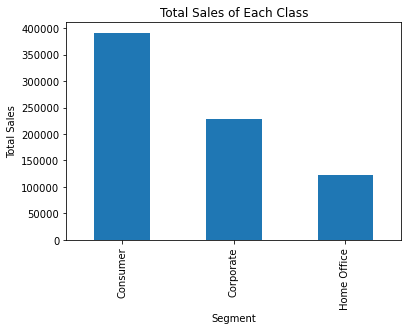

In [100]:
data.Sales.groupby(data['Segment']).sum().plot(kind='bar')
plt.ylabel('Total Sales')
plt.title('Total Sales of Each Class')

Text(0.5, 1.0, 'Total Order of Each Class')

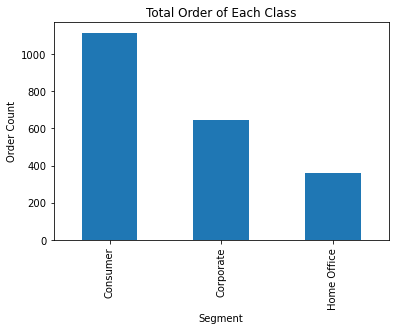

In [101]:
data.Sales.groupby(data['Segment']).count().plot(kind='bar')
plt.ylabel('Order Count')
plt.title('Total Order of Each Class')

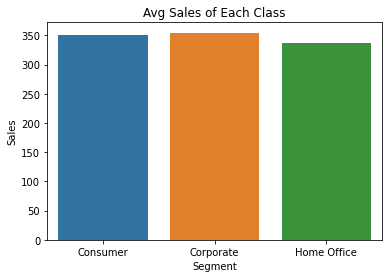

In [102]:
sns.barplot(x= data['Segment'], y = data.Sales, ci=None)
plt.title('Avg Sales of Each Class')
plt.show()

In [103]:
data_top_city.Sales.groupby(data_top_city['City']).describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Chicago,68.0,183.753265,228.431455,1.892,17.1610,87.020,243.57075,844.1160
Houston,81.0,286.212523,384.180957,2.328,21.2040,107.772,383.46560,2396.2656
Los Angeles,154.0,350.649617,502.123399,4.160,62.7645,199.552,413.64000,3406.6640
New York City,192.0,394.224214,604.122034,6.160,68.9880,192.085,429.39450,4228.7040
Philadelphia,111.0,328.788658,575.882899,2.960,51.5200,138.588,362.96000,4416.1740
San Francisco,102.0,356.444196,446.587665,4.950,37.3600,194.992,481.41450,2003.5200
Seattle,97.0,422.637918,620.305668,6.160,63.4700,171.960,515.88000,3393.6800


Text(0.5, 1.0, 'Total Sales of Each Class')

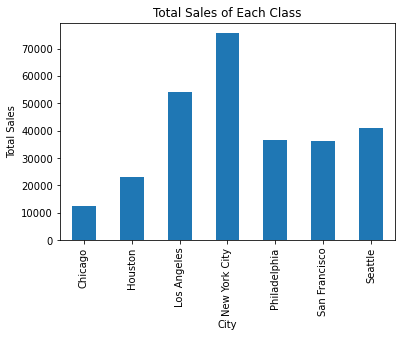

In [104]:
data_top_city.Sales.groupby(data_top_city['City']).sum().plot(kind='bar')
plt.ylabel('Total Sales')
plt.title('Total Sales of Each Class')

Text(0.5, 1.0, 'Total Order of Each Class')

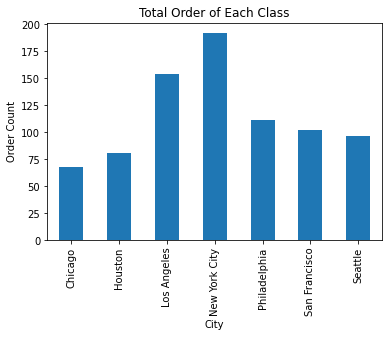

In [105]:
data_top_city.Sales.groupby(data_top_city['City']).count().plot(kind='bar')
plt.ylabel('Total Sales')
plt.ylabel('Order Count')
plt.title('Total Order of Each Class')

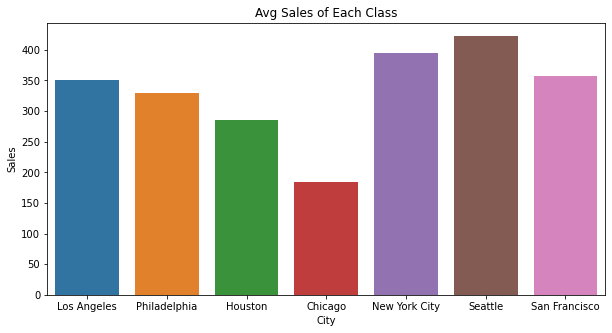

In [106]:
plt.figure(figsize = (10,5))
sns.barplot(x= data_top_city['City'], y = data_top_city.Sales, ci=None)
plt.title('Avg Sales of Each Class')
plt.show()

In [107]:
data.Sales.groupby(data['Sub-Category']).describe()

,count,mean,std,min,25%,50%,75%,max
Sub-Category,,,,,,,,
Bookcases,228.0,503.859633,638.748523,35.490,190.500,306.82025,522.285,4404.900
Chairs,617.0,532.332420,550.148243,26.640,191.960,362.13600,662.880,4416.174
Furnishings,957.0,95.825668,147.893640,1.892,19.300,41.96000,106.680,1336.440
Tables,319.0,648.794771,615.774655,24.368,244.006,447.84000,872.170,4297.644


Text(0.5, 1.0, 'Total Sales of Each Class')

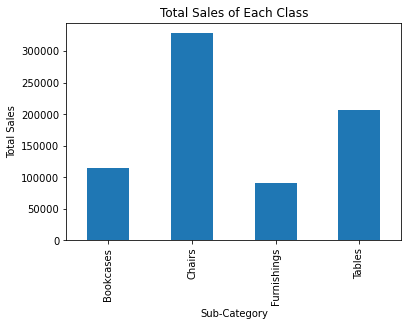

In [108]:
data.Sales.groupby(data['Sub-Category']).sum().plot(kind='bar')
plt.ylabel('Total Sales')
plt.title('Total Sales of Each Class')

Text(0.5, 1.0, 'Total Order of Each Class')

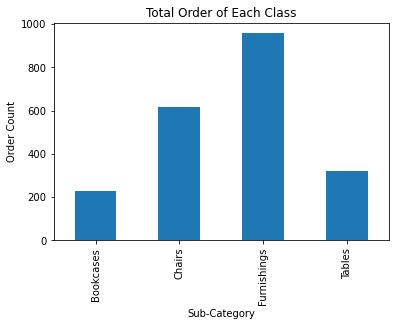

In [109]:
data.Sales.groupby(data['Sub-Category']).count().plot(kind='bar')
plt.ylabel('Order Count')
plt.title('Total Order of Each Class')

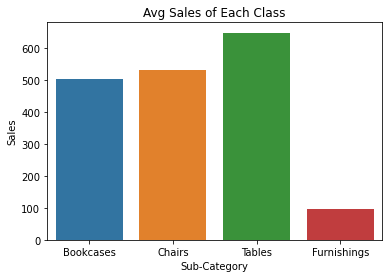

In [110]:
sns.barplot(x= data['Sub-Category'], y = data.Sales, ci=None)
plt.title('Avg Sales of Each Class')
plt.show()

In [111]:
data.Quantity.describe()

count    2121.000000
mean        3.785007
std         2.251620
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

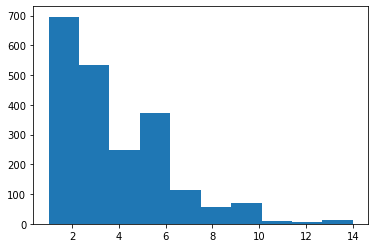

In [112]:
plt.hist(data.Quantity)
plt.show()

<AxesSubplot:ylabel='Density'>

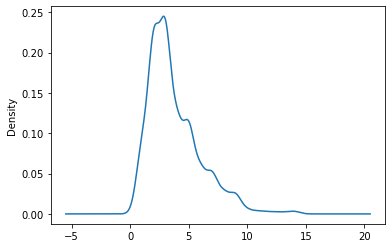

In [113]:
data.Quantity.plot(kind='kde')

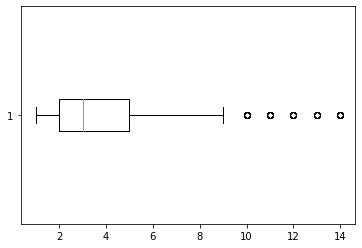

In [114]:
plt.boxplot(data.Quantity, vert=False)
plt.show()

In [115]:
data.Quantity.groupby(data['Ship Mode']).describe()

,count,mean,std,min,25%,50%,75%,max
Ship Mode,,,,,,,,
First Class,327.0,3.785933,2.202213,1.0,2.0,3.0,5.0,13.0
Same Day,119.0,3.806723,2.183440,1.0,2.0,3.0,5.0,10.0
Second Class,427.0,3.674473,2.263069,1.0,2.0,3.0,5.0,14.0
Standard Class,1248.0,3.820513,2.268256,1.0,2.0,3.0,5.0,14.0


<AxesSubplot:xlabel='Ship Mode', ylabel='Quantity'>

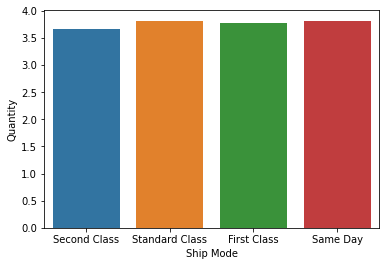

In [116]:
sns.barplot(x= data['Ship Mode'], y = data.Quantity, ci=None)

In [117]:
data.Quantity.groupby(data['Segment']).describe()

,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
Consumer,1113.0,3.743037,2.195996,1.0,2.0,3.0,5.0,14.0
Corporate,646.0,3.862229,2.263543,1.0,2.0,3.0,5.0,14.0
Home Office,362.0,3.776243,2.397411,1.0,2.0,3.0,5.0,14.0


<AxesSubplot:xlabel='Segment', ylabel='Quantity'>

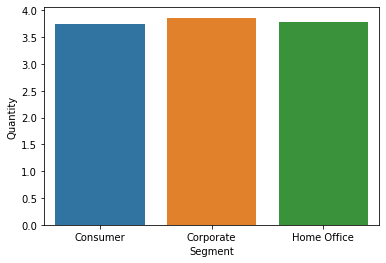

In [118]:
sns.barplot(x= data['Segment'], y = data.Quantity, ci=None)

In [119]:
data_top_city.Quantity.groupby(data_top_city['City']).describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Chicago,68.0,3.397059,2.095765,1.0,2.0,3.0,5.0,9.0
Houston,81.0,3.592593,1.801234,1.0,2.0,3.0,5.0,10.0
Los Angeles,154.0,3.818182,2.143403,1.0,2.0,3.0,5.0,11.0
New York City,192.0,3.750000,2.566396,1.0,2.0,3.0,5.0,14.0
Philadelphia,111.0,4.045045,2.402224,1.0,2.0,3.0,5.5,12.0
San Francisco,102.0,3.911765,2.350913,1.0,2.0,3.0,5.0,13.0
Seattle,97.0,3.814433,2.513836,1.0,2.0,3.0,5.0,13.0


<AxesSubplot:xlabel='City', ylabel='Quantity'>

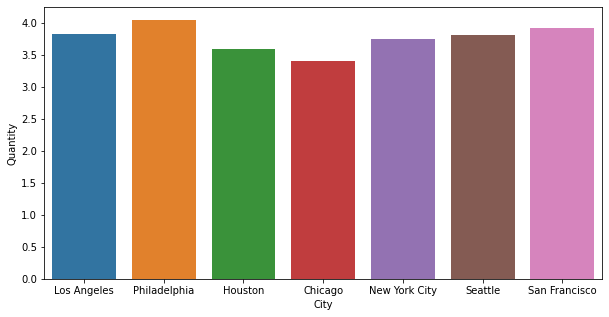

In [120]:
plt.figure(figsize = (10,5))
sns.barplot(x= data_top_city['City'], y = data_top_city.Quantity, ci=None)

In [121]:
data.Quantity.groupby(data['Sub-Category']).describe()

,count,mean,std,min,25%,50%,75%,max
Sub-Category,,,,,,,,
Bookcases,228.0,3.807018,2.283352,1.0,2.0,3.0,5.0,13.0
Chairs,617.0,3.818476,2.282652,1.0,2.0,3.0,5.0,14.0
Furnishings,957.0,3.723093,2.155954,1.0,2.0,3.0,5.0,14.0
Tables,319.0,3.890282,2.446381,1.0,2.0,3.0,5.0,13.0


<AxesSubplot:xlabel='Sub-Category', ylabel='Quantity'>

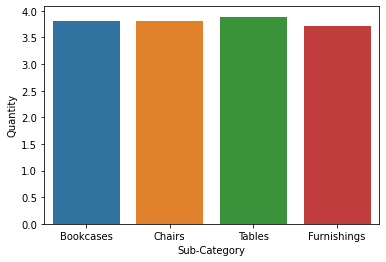

In [122]:
sns.barplot(x= data['Sub-Category'], y = data.Quantity, ci=None)

In [123]:
data.Discount.describe()

count    2121.000000
mean        0.173923
std         0.181547
min         0.000000
25%         0.000000
50%         0.200000
75%         0.300000
max         0.700000
Name: Discount, dtype: float64

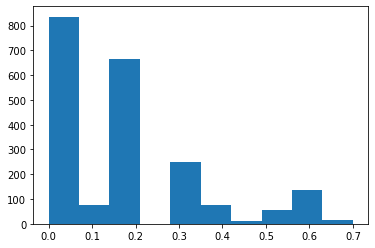

In [124]:
plt.hist(data.Discount)
plt.show()

<AxesSubplot:ylabel='Density'>

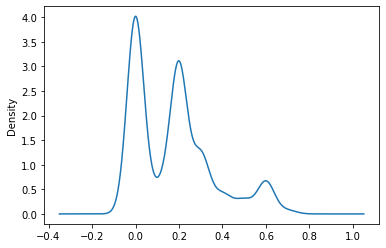

In [125]:
data.Discount.plot(kind='kde')

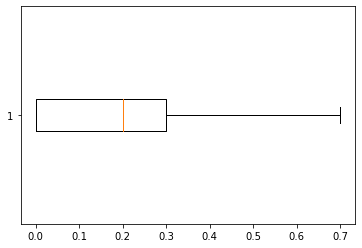

In [126]:
plt.boxplot(data.Discount, vert=False)
plt.show()

In [127]:
data.Discount.groupby(data['Ship Mode']).describe()

,count,mean,std,min,25%,50%,75%,max
Ship Mode,,,,,,,,
First Class,327.0,0.180031,0.173325,0.0,0.0,0.2,0.25,0.7
Same Day,119.0,0.186134,0.176468,0.0,0.0,0.2,0.30,0.6
Second Class,427.0,0.172482,0.190170,0.0,0.0,0.2,0.30,0.7
Standard Class,1248.0,0.171651,0.181242,0.0,0.0,0.2,0.30,0.7


<AxesSubplot:xlabel='Ship Mode', ylabel='Discount'>

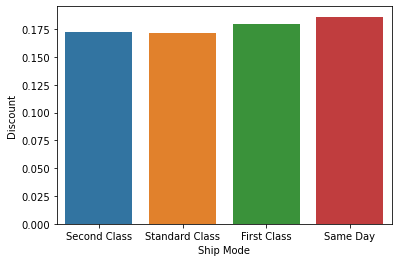

In [128]:
sns.barplot(x= data['Ship Mode'], y = data.Discount, ci=None)

In [129]:
data.Discount.groupby(data['Segment']).describe()

,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
Consumer,1113.0,0.176739,0.183693,0.0,0.0,0.2,0.3,0.7
Corporate,646.0,0.174071,0.178244,0.0,0.0,0.2,0.2,0.7
Home Office,362.0,0.165000,0.180961,0.0,0.0,0.2,0.2,0.6


<AxesSubplot:xlabel='Segment', ylabel='Discount'>

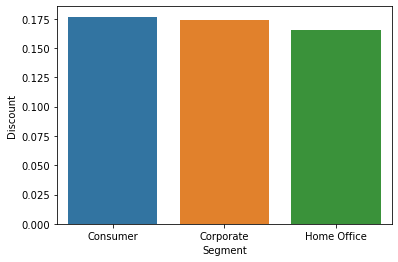

In [130]:
sns.barplot(x= data['Segment'], y = data.Discount, ci=None)

In [131]:
data_top_city.Discount.groupby(data_top_city['City']).describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Chicago,68.0,0.477941,0.140198,0.3,0.3,0.600,0.6,0.6
Houston,81.0,0.428889,0.146595,0.3,0.3,0.320,0.6,0.6
Los Angeles,154.0,0.113636,0.095874,0.0,0.0,0.175,0.2,0.2
New York City,192.0,0.110417,0.127792,0.0,0.0,0.100,0.2,0.4
Philadelphia,111.0,0.276577,0.094345,0.2,0.2,0.200,0.3,0.5
San Francisco,102.0,0.101961,0.094377,0.0,0.0,0.150,0.2,0.2
Seattle,97.0,0.061856,0.092919,0.0,0.0,0.000,0.2,0.2


<AxesSubplot:xlabel='City', ylabel='Discount'>

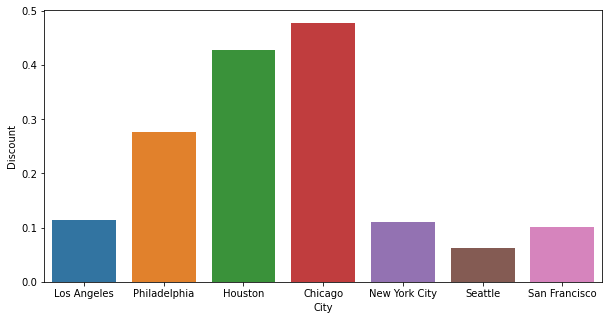

In [132]:
plt.figure(figsize = (10,5))
sns.barplot(x= data_top_city['City'], y = data_top_city.Discount, ci=None)

In [133]:
data.Discount.groupby(data['Sub-Category']).describe()

,count,mean,std,min,25%,50%,75%,max
Sub-Category,,,,,,,,
Bookcases,228.0,0.211140,0.191913,0.0,0.0,0.2,0.32,0.7
Chairs,617.0,0.170178,0.107444,0.0,0.1,0.2,0.30,0.3
Furnishings,957.0,0.138349,0.207804,0.0,0.0,0.0,0.20,0.6
Tables,319.0,0.261285,0.169622,0.0,0.2,0.3,0.40,0.5


<AxesSubplot:xlabel='Sub-Category', ylabel='Discount'>

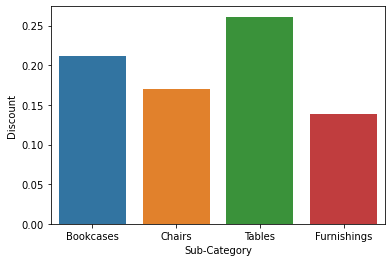

In [134]:
sns.barplot(x= data['Sub-Category'], y = data.Discount, ci=None)

In [135]:
data.Profit.describe()

count    2121.000000
mean        8.699327
std       136.049246
min     -1862.312400
25%       -12.849000
50%         7.774800
75%        33.726600
max      1013.127000
Name: Profit, dtype: float64

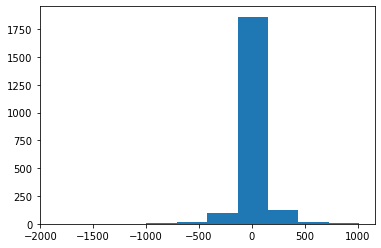

In [136]:
plt.hist(data.Profit)
plt.show()

<AxesSubplot:ylabel='Density'>

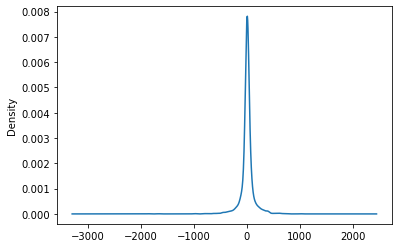

In [137]:
data.Profit.plot(kind='kde')

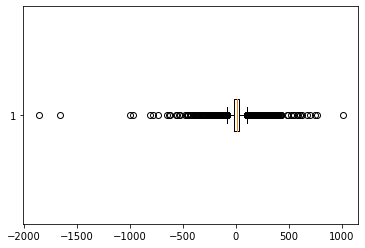

In [138]:
plt.boxplot(data.Profit, vert=False)
plt.show()

In [139]:
data.Profit.groupby(data['Ship Mode']).describe()

,count,mean,std,min,25%,50%,75%,max
Ship Mode,,,,,,,,
First Class,327.0,9.379044,118.507050,-1002.7836,-12.849000,6.37800,26.9538,673.8816
Same Day,119.0,6.700407,102.753447,-350.4900,-13.471200,7.15920,30.1755,373.7790
Second Class,427.0,9.897568,155.542096,-1862.3124,-7.435400,7.81660,38.2850,700.9800
Standard Class,1248.0,8.301855,136.127939,-1665.0522,-13.693275,8.10795,32.7426,1013.1270


<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

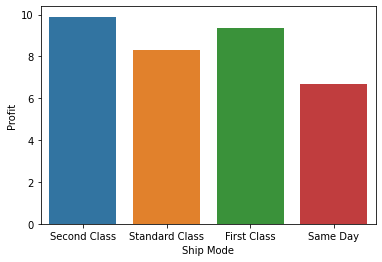

In [140]:
sns.barplot(x= data['Ship Mode'], y = data.Profit, ci=None)

In [141]:
data.Profit.groupby(data['Segment']).describe()

,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
Consumer,1113.0,6.281293,137.241544,-1862.3124,-14.1960,7.1060,32.63320,770.3520
Corporate,646.0,11.741201,132.952325,-968.8833,-11.6178,7.8031,35.38320,1013.1270
Home Office,362.0,10.705465,138.050989,-1002.7836,-10.1002,8.6137,31.97325,746.4078


<AxesSubplot:xlabel='Segment', ylabel='Profit'>

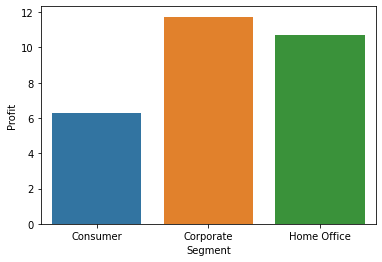

In [142]:
sns.barplot(x= data['Segment'], y = data.Profit, ci=None)

In [143]:
data_top_city.Profit.groupby(data_top_city['City']).describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Chicago,68.0,-51.712740,90.293630,-566.5625,-63.289875,-15.04645,-5.94340,0.0000
Houston,81.0,-42.034605,54.293561,-317.1528,-67.137000,-18.11760,-5.83460,0.0000
Los Angeles,154.0,19.945398,55.054311,-217.0480,3.027550,12.46620,28.19845,297.6900
New York City,192.0,27.639018,121.399377,-553.6476,3.050250,14.98080,50.32065,609.7157
Philadelphia,111.0,-61.505634,189.678693,-1665.0522,-57.476400,-5.52400,5.27730,75.5424
San Francisco,102.0,14.621382,64.534346,-325.5720,2.251200,10.88420,30.74070,225.7350
Seattle,97.0,64.008435,121.860133,-73.0548,5.534100,25.51120,55.01600,629.0100


<AxesSubplot:xlabel='City', ylabel='Profit'>

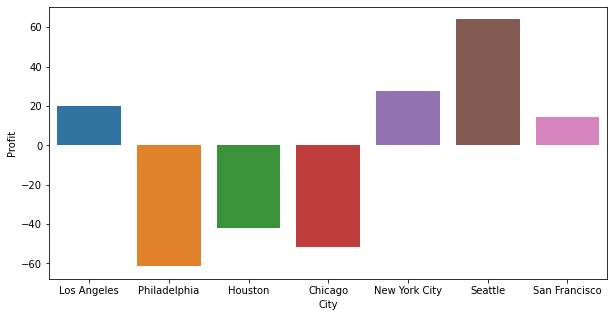

In [144]:
plt.figure(figsize = (10,5))
sns.barplot(x= data_top_city['City'], y = data_top_city.Profit, ci=None)

In [145]:
data.Profit.groupby(data['Sub-Category']).describe()

,count,mean,std,min,25%,50%,75%,max
Sub-Category,,,,,,,,
Bookcases,228.0,-15.230509,182.034224,-1665.0522,-42.6312,4.1333,40.0541,1013.1270
Chairs,617.0,43.095894,127.099922,-630.8820,-14.4784,13.3176,70.1960,770.3520
Furnishings,957.0,13.645918,52.753228,-427.4500,2.7944,9.1020,21.8192,387.5676
Tables,319.0,-55.565771,230.565006,-1862.3124,-122.8293,-31.3722,33.8517,629.0100


<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

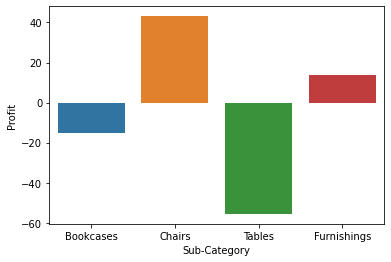

In [146]:
sns.barplot(x= data['Sub-Category'], y = data.Profit, ci=None)

In [147]:
del data['Country']

In [148]:
del data['Category']

In [149]:
del data_top_city['Country']

In [150]:
del data_top_city['Category']

In [151]:
data.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Sub-Category,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,South,Bookcases,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,South,Chairs,731.9400,3,0.00,219.5820
2,2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Tables,957.5775,5,0.45,-383.0310
3,2014-06-09,2014-06-14,Standard Class,Consumer,Los Angeles,California,West,Furnishings,48.8600,7,0.00,14.1694
4,2014-06-09,2014-06-14,Standard Class,Consumer,Los Angeles,California,West,Tables,1706.1840,9,0.20,85.3092


In [152]:
data.shape

(2121, 12)

In [153]:
top_city.head()

New York City    192
Los Angeles      154
Philadelphia     111
San Francisco    102
Seattle           97
Name: City, dtype: int64

In [154]:
data_top_city.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Sub-Category,Sales,Quantity,Discount,Profit
3,2014-06-09,2014-06-14,Standard Class,Consumer,Los Angeles,California,West,Furnishings,48.860,7,0.0,14.1694
4,2014-06-09,2014-06-14,Standard Class,Consumer,Los Angeles,California,West,Tables,1706.184,9,0.2,85.3092
5,2017-07-16,2017-07-18,Second Class,Consumer,Philadelphia,Pennsylvania,East,Chairs,71.372,2,0.3,-1.0196
7,2015-09-17,2015-09-21,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Bookcases,3083.430,7,0.5,-1665.0522
8,2015-09-17,2015-09-21,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furnishings,124.200,3,0.2,15.5250


In [155]:
data_top_city.shape

(805, 12)

In [156]:
data_order = data.loc[:,['Order Date', 'Sales']]

In [157]:
data_order.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2015-10-11,957.5775
3,2014-06-09,48.8600
4,2014-06-09,1706.1840


In [158]:
data_order = data_order.set_index(['Order Date'])

In [159]:
data_order.sort_index(inplace=True)

In [160]:
data_order.head(50)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940
2014-01-13,333.999
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470


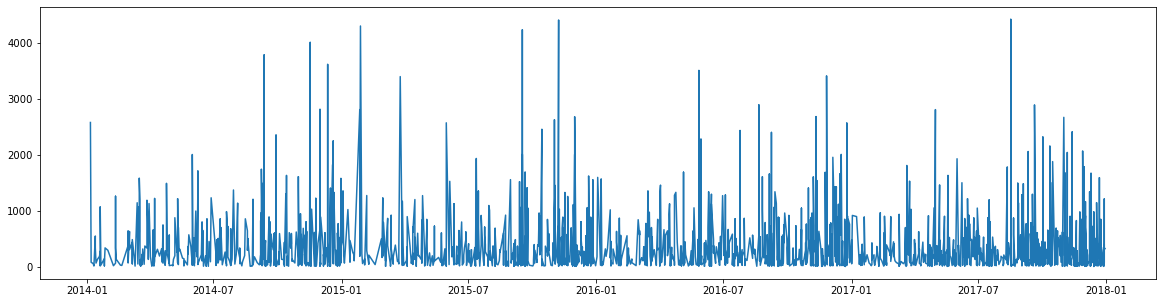

In [161]:
plt.figure(figsize=(20,5))
plt.plot(data_order)

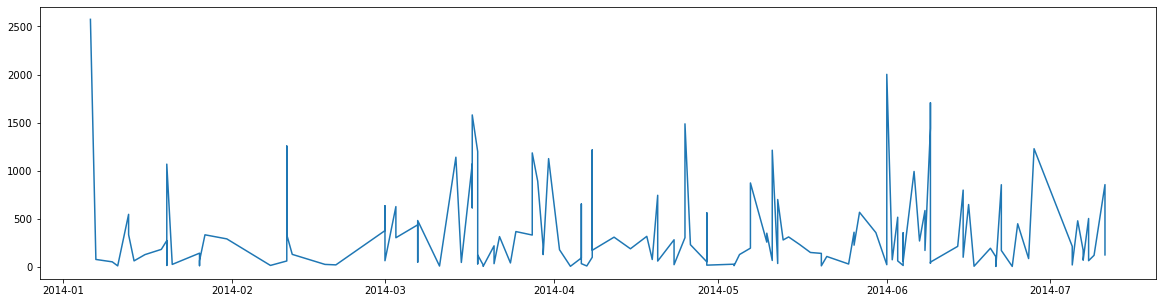

In [162]:
plt.figure(figsize=(20,5))
plt.plot(data_order[:150])

In [163]:
data_order_sales_day = pd.DataFrame(data_order.resample('D').sum())

In [164]:
data_order_sales_day

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-08,0.0000
2014-01-09,0.0000
2014-01-10,51.9400
...,...
2017-12-26,0.0000
2017-12-27,0.0000
2017-12-28,551.2568


In [165]:
data_order_sales_mean = pd.DataFrame(data_order.resample('MS').mean())

In [166]:
data_order_sales_mean.count()

Sales    48
dtype: int64

In [167]:
data_order_sales_mean.head()

,Sales
Order Date,
2014-01-01,312.126250
2014-02-01,262.808286
2014-03-01,441.635030
2014-04-01,305.570654
2014-05-01,288.032792


In [168]:
sales_mean_mul = seasonal_decompose(data_order_sales_mean, model='mul')

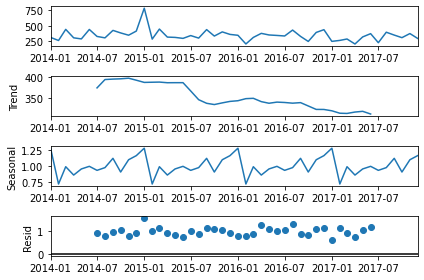

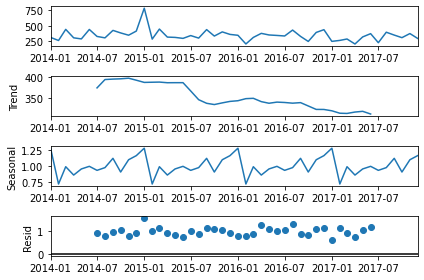

In [169]:
sales_mean_mul.plot()

In [170]:
# Need to Check Stationarity

In [171]:
from statsmodels.tsa.stattools import adfuller
data_order_adf = adfuller(data_order_sales_mean)

In [172]:
print('ADF Statistic: ', data_order_adf[0])
print('p-value: %f' % data_order_adf[1])
print('Critical Values:')
for key, value in data_order_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic:  -6.962405221214859
p-value: 0.000000
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


In [173]:
import itertools

In [174]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [175]:
import warnings
warnings.filterwarnings('ignore')
aic_scores = {}
i = 1
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('{}: ARIMA{}x{}12 - AIC:{}'.format(i,param, param_seasonal, results.aic))
            aic_scores[i] = results.aic
            i += 1
        except:
            continue

In [176]:
aic_scores

{}

In [177]:
data_order_sales = pd.DataFrame(data_order.resample('M').sum())

In [178]:
data_order_sales

,Sales
Order Date,
2014-01-31,6242.5250
2014-02-28,1839.6580
2014-03-31,14573.9560
2014-04-30,7944.8370
2014-05-31,6912.7870
2014-06-30,13206.1256
2014-07-31,10821.0510
2014-08-31,7320.3465
2014-09-30,23816.4808


In [179]:
sales_dec_mul = seasonal_decompose(data_order_sales, model='mul')

In [180]:
sales_dec_mul

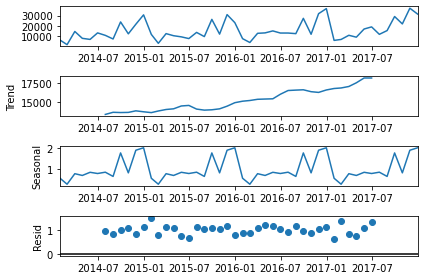

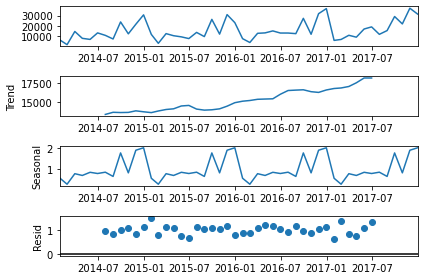

In [181]:
sales_dec_mul.plot()

In [182]:
sales_dec_mul.observed.head(10)

Order Date
2014-01-31     6242.5250
2014-02-28     1839.6580
2014-03-31    14573.9560
2014-04-30     7944.8370
2014-05-31     6912.7870
2014-06-30    13206.1256
2014-07-31    10821.0510
2014-08-31     7320.3465
2014-09-30    23816.4808
2014-10-31    12304.2470
Freq: M, dtype: float64

In [183]:
sales_dec_mul.trend.head(10)

Order Date
2014-01-31             NaN
2014-02-28             NaN
2014-03-31             NaN
2014-04-30             NaN
2014-05-31             NaN
2014-06-30             NaN
2014-07-31    13328.463450
2014-08-31    13611.468975
2014-09-30    13578.991600
2014-10-31    13598.020287
Freq: M, Name: trend, dtype: float64

In [184]:
sales_dec_mul.seasonal.head(10)

Order Date
2014-01-31    0.574453
2014-02-28    0.297418
2014-03-31    0.788004
2014-04-30    0.705844
2014-05-31    0.853206
2014-06-30    0.796706
2014-07-31    0.857910
2014-08-31    0.660678
2014-09-30    1.757303
2014-10-31    0.827278
Freq: M, Name: seasonal, dtype: float64

In [185]:
sales_dec_mul.resid.head(10)

Order Date
2014-01-31         NaN
2014-02-28         NaN
2014-03-31         NaN
2014-04-30         NaN
2014-05-31         NaN
2014-06-30         NaN
2014-07-31    0.946340
2014-08-31    0.814023
2014-09-30    0.998076
2014-10-31    1.093775
Freq: M, Name: resid, dtype: float64

In [186]:
sales_dec_add = seasonal_decompose(data_order_sales, model='additive')

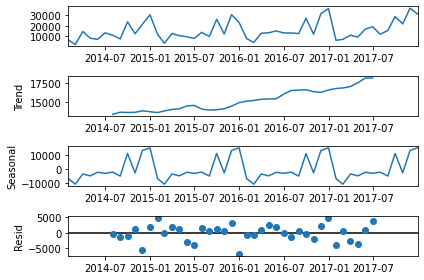

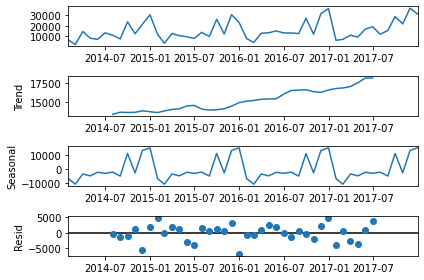

In [187]:
sales_dec_add.plot()

In [188]:
sales_dec_add.observed.head(10)

Order Date
2014-01-31     6242.5250
2014-02-28     1839.6580
2014-03-31    14573.9560
2014-04-30     7944.8370
2014-05-31     6912.7870
2014-06-30    13206.1256
2014-07-31    10821.0510
2014-08-31     7320.3465
2014-09-30    23816.4808
2014-10-31    12304.2470
Freq: M, dtype: float64

In [189]:
sales_dec_add.trend.head(10)

Order Date
2014-01-31             NaN
2014-02-28             NaN
2014-03-31             NaN
2014-04-30             NaN
2014-05-31             NaN
2014-06-30             NaN
2014-07-31    13328.463450
2014-08-31    13611.468975
2014-09-30    13578.991600
2014-10-31    13598.020287
Freq: M, Name: trend, dtype: float64

In [190]:
sales_dec_add.seasonal.head(10)

Order Date
2014-01-31    -6634.522912
2014-02-28   -10561.250680
2014-03-31    -3323.748945
2014-04-30    -4676.044823
2014-05-31    -2124.730005
2014-06-30    -2903.472874
2014-07-31    -2036.785651
2014-08-31    -4810.005684
2014-09-30    11141.368769
2014-10-31    -2539.396546
Freq: M, Name: seasonal, dtype: float64

In [191]:
sales_dec_add.resid.head(10)

Order Date
2014-01-31            NaN
2014-02-28            NaN
2014-03-31            NaN
2014-04-30            NaN
2014-05-31            NaN
2014-06-30            NaN
2014-07-31    -470.626799
2014-08-31   -1481.116791
2014-09-30    -903.879569
2014-10-31    1245.623259
Freq: M, Name: resid, dtype: float64

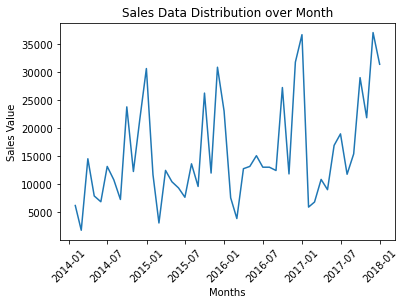

In [192]:
#Plot: sales monthwise
plt.plot(data_order_sales)
plt.xticks(rotation=45)
plt.title('Sales Data Distribution over Month') 
plt.xlabel('Months')
plt.ylabel('Sales Value') 
plt.show()

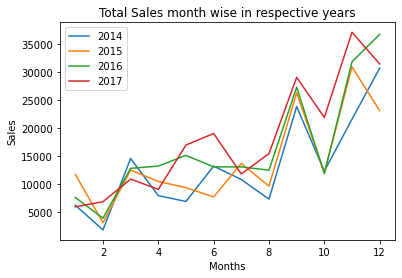

In [193]:
plt.plot(data.Sales[data['Order Date'].dt.year == 2014].groupby(data['Order Date'].dt.month).sum())
plt.plot(data.Sales[data['Order Date'].dt.year == 2015].groupby(data['Order Date'].dt.month).sum())
plt.plot(data.Sales[data['Order Date'].dt.year == 2016].groupby(data['Order Date'].dt.month).sum()) 
plt.plot(data.Sales[data['Order Date'].dt.year == 2017].groupby(data['Order Date'].dt.month).sum())
plt.xlabel('Months')
plt.ylabel('Sales')

plt.title('Total Sales month wise in respective years') 
plt.legend([2014,2015,2016,2017], loc = 2)
plt.show()

In [194]:
# Need to Check Stationarity

In [195]:
from statsmodels.tsa.stattools import adfuller
data_order_adf = adfuller(data_order_sales)

In [196]:
print('ADF Statistic: ', data_order_adf[0])
print('p-value: %f' % data_order_adf[1])
print('Critical Values:')
for key, value in data_order_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic:  -4.699026242828903
p-value: 0.000085
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


In [197]:
data_order_adf

(-4.699026242828903,
 8.450793985809654e-05,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 781.9861669712573)

In [198]:
# H Null : There is no Stationarity. Since p-value<0.05 we reject Null Hupothesis. So We can say there is Stationarity in the data.

In [199]:
#Applying autoarima
from pmdarima import auto_arima
model_autoarima = auto_arima(data_order_sales) 
model_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -502.820
Date:                Wed, 11 Oct 2023   AIC                           1011.640
Time:                        11:44:17   BIC                           1017.253
Sample:                    01-31-2014   HQIC                          1013.761
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.084e+04   2695.066      4.021      0.000    5554.237    1.61e+04
ar.L1          0.3056      0.131      2.328      0.020       0.048       0.563
sigma2      7.318e+07      0.160   4.56e+08      0.000    7.32e+07    7.32e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.70
Prob(Q):                              0.98   Prob(JB):                         0.16
Heteroskedasticity (H):               1.88   Skew:                             0.64
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.29e+28. Standard errors may be unstable.
"""

In [200]:
sales_forecast = model_autoarima.predict(n_periods=12)

In [201]:
sales_forecast = pd.DataFrame(sales_forecast, columns=data_order_sales.columns)

In [202]:
sales_forecast

,Sales
2018-01-31,20433.225511
2018-02-28,17079.974664
2018-03-31,16055.367044
2018-04-30,15742.291517
2018-05-31,15646.629252
2018-06-30,15617.399025
2018-07-31,15608.467538
2018-08-31,15605.738465
2018-09-30,15604.904578
2018-10-31,15604.649779


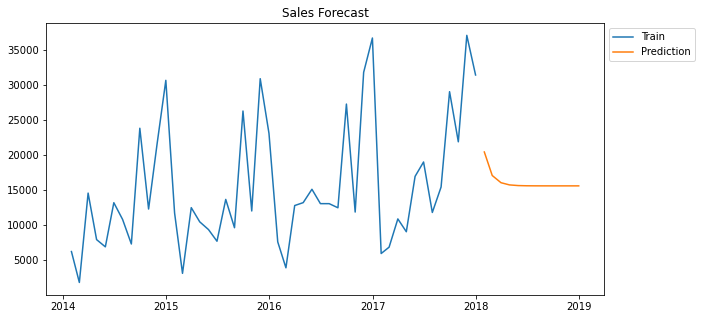

In [203]:
plt.figure(figsize = (10,5))
plt.plot(data_order_sales)
plt.plot(sales_forecast)
plt.title('Sales Forecast')
plt.legend(['Train','Prediction'], bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [204]:
sales_estimated = model_autoarima.predict_in_sample()

In [205]:
sales_estimated.head(10)

Order Date
2014-01-31    15604.537667
2014-02-28    12743.913767
2014-03-31    11398.589101
2014-04-30    15289.636731
2014-05-31    13264.066278
2014-06-30    12948.716683
2014-07-31    14871.687251
2014-08-31    14142.912184
2014-09-30    13073.249141
2014-10-31    18113.750336
Freq: M, Name: predicted_mean, dtype: float64

In [206]:
residual_auto = model_autoarima.resid()

In [207]:
residual_auto.head()

Order Date
2014-01-31    -9362.012667
2014-02-28   -10904.255767
2014-03-31     3175.366899
2014-04-30    -7344.799731
2014-05-31    -6351.279278
Freq: M, dtype: float64

<AxesSubplot:ylabel='Count'>

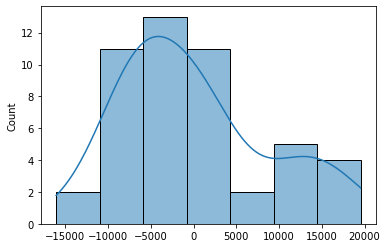

In [208]:
sns.histplot(residual_auto, kde=True)

In [209]:
mse_auto = mean_squared_error(data_order_sales,sales_estimated)

In [210]:
mse_auto

73531592.94893768

In [211]:
mse_auto_1 = (residual_auto**2).sum()/len(residual_auto)

In [212]:
mse_auto_1

73531592.94893768

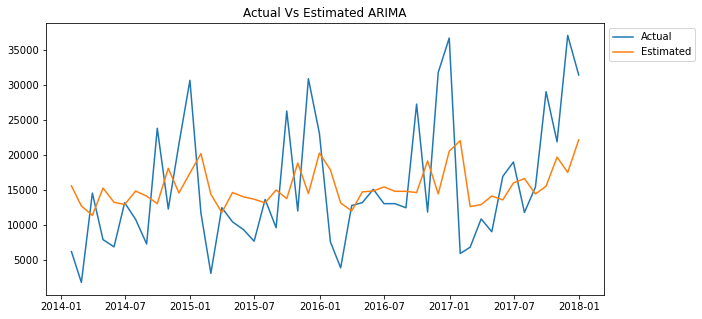

In [213]:
plt.figure(figsize=(10,5))
plt.plot(data_order_sales)
plt.plot(sales_estimated)
plt.title('Actual Vs Estimated ARIMA')
plt.legend(['Actual','Estimated'], bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [214]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

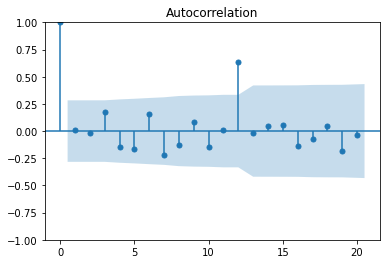

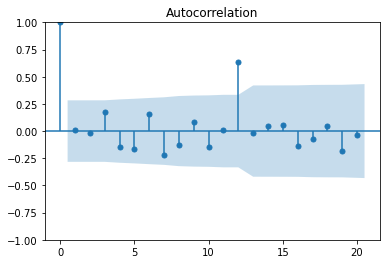

In [215]:
plot_acf(residual_auto, lags=20)

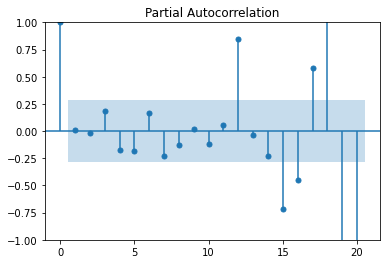

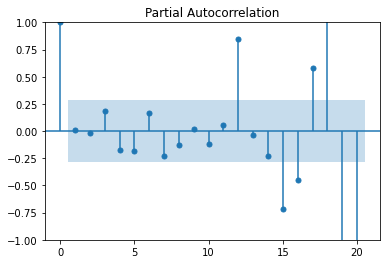

In [216]:
plot_pacf(residual_auto, lags=20)

In [217]:
# Since there trend and seasonality check with triple exponential Smoothening

In [218]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [219]:
model_es = ExponentialSmoothing(data_order_sales, seasonal_periods=12, trend = 'add', seasonal= 'add' ).fit()

In [220]:
model_es.summary()

Dep. Variable:,Sales,No. Observations:,48
Model:,ExponentialSmoothing,SSE,437279484.681
Optimized:,True,AIC,801.194
Trend:,Additive,BIC,831.134
Seasonal:,Additive,AICC,824.781
Seasonal Periods:,12,Date:,"Wed, 11 Oct 2023"
Box-Cox:,False,Time:,11:44:23
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0757143,alpha,True
smoothing_trend,0.0757143,beta,True


In [221]:
sales_forecast_es = model_es.forecast(steps=12)

In [222]:
sales_forecast_es

2018-01-31    12288.003483
2018-02-28     8554.160727
2018-03-31    15985.164899
2018-04-30    14825.253388
2018-05-31    17569.205334
2018-06-30    16984.151074
2018-07-31    18042.982322
2018-08-31    15463.335724
2018-09-30    31607.341204
2018-10-31    18120.102346
2018-11-30    34166.461671
2018-12-31    36199.173887
Freq: M, dtype: float64

In [223]:
sales_forecast_es = pd.DataFrame(sales_forecast_es, columns=data_order_sales.columns)

In [224]:
sales_forecast_es

,Sales
2018-01-31,12288.003483
2018-02-28,8554.160727
2018-03-31,15985.164899
2018-04-30,14825.253388
2018-05-31,17569.205334
2018-06-30,16984.151074
2018-07-31,18042.982322
2018-08-31,15463.335724
2018-09-30,31607.341204
2018-10-31,18120.102346


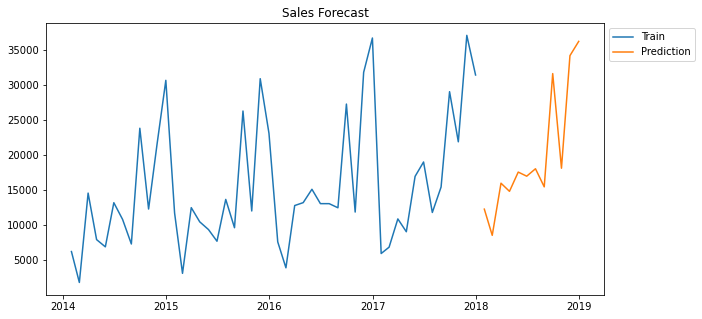

In [225]:
plt.figure(figsize = (10,5))
plt.plot(data_order_sales)
plt.plot(sales_forecast_es)
plt.title('Sales Forecast')
plt.legend(['Train','Prediction'], bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [226]:
sales_estimated_es = model_es.fittedvalues

In [227]:
sales_estimated_es.head(10)

Order Date
2014-01-31     6790.384086
2014-02-28     2880.555398
2014-03-31    10091.659067
2014-04-30     9156.845289
2014-05-31    11687.553932
2014-06-30    10591.081079
2014-07-31    11714.543758
2014-08-31     8927.330702
2014-09-30    24801.478354
2014-10-31    11084.932864
Freq: M, dtype: float64

In [228]:
residual_es = model_es.resid

In [229]:
residual_es.head()

Order Date
2014-01-31    -547.859086
2014-02-28   -1040.897398
2014-03-31    4482.296933
2014-04-30   -1212.008289
2014-05-31   -4774.766932
Freq: M, dtype: float64

<AxesSubplot:ylabel='Count'>

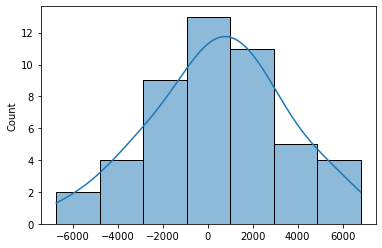

In [230]:
sns.histplot(residual_es, kde=True)

In [231]:
mse_es = mean_squared_error(data_order_sales,sales_estimated_es)

In [232]:
mse_es

9109989.264181623

In [233]:
mse_es_1 = (residual_es**2).sum()/len(residual_es)

In [234]:
mse_es_1

9109989.264181623

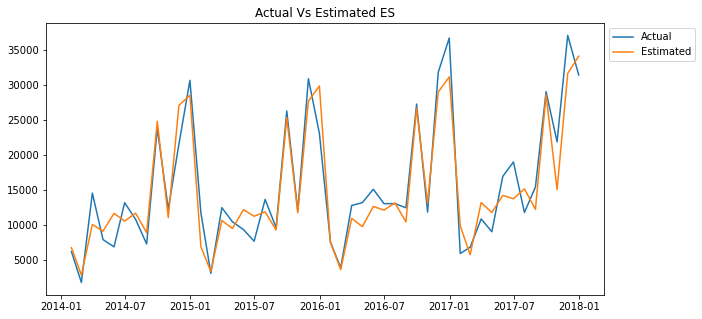

In [235]:
plt.figure(figsize=(10,5))
plt.plot(data_order_sales)
plt.plot(sales_estimated_es)
plt.title('Actual Vs Estimated ES')
plt.legend(['Actual','Estimated'], bbox_to_anchor=(1, 1), loc=2)
plt.show()